In [183]:
%matplotlib inline
import torch
import random
from d2l import torch as d2l

In [184]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w),))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X \
        , y.reshape((-1, 1)),


true_w = torch.tensor([2., -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

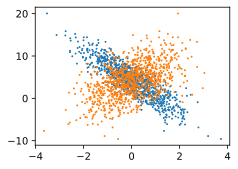

In [185]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)
d2l.plt.scatter(features[:, 0].numpy(), labels.numpy(), 1)

In [186]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples + 1)])
        yield features[batch_indices], labels[batch_indices]


batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break


tensor([[ 0.0903, -1.3687],
        [-0.7511, -0.3288],
        [ 0.1870,  0.7191],
        [ 1.3310,  0.1348],
        [-0.0924, -0.3222],
        [ 0.5277, -1.8475],
        [ 0.8900,  0.2783],
        [-1.0194, -0.9602],
        [-0.8329,  0.8329],
        [-0.8333,  1.5248]]) 
 tensor([[ 9.0421],
        [ 3.8171],
        [ 2.1161],
        [ 6.4073],
        [ 5.1028],
        [11.5264],
        [ 5.0382],
        [ 5.4277],
        [-0.3156],
        [-2.6762]])


In [187]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b

(tensor([[-0.0174],
         [-0.0026]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [188]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [189]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [190]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [191]:
lr = 0.6
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, len(y))
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000051
epoch 2, loss 0.000056
epoch 3, loss 0.000049


In [192]:
print(f'w的估计误差：{float((true_w - w.reshape(true_w.shape)).mean()):f}')
print(f'b的估计误差：{float(true_b - b):f}')

w的估计误差：-0.000469
b的估计误差：-0.000569
